## Tutorial used to Learn Scikit-Learn - FreeCodeCamp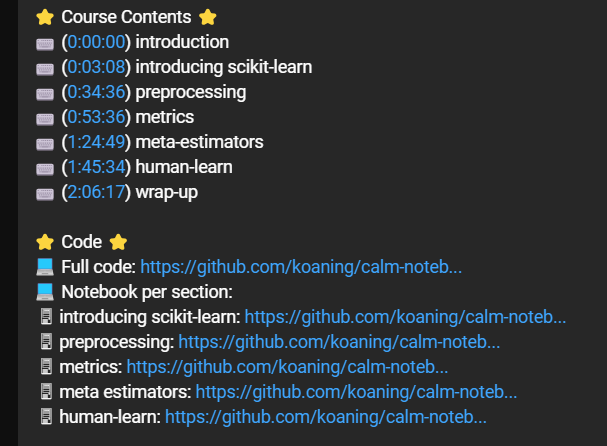

*   https://www.youtube.com/watch?v=0B5eIE_1vpU




In [2]:
# importing all the libaries here

#qs1
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#qs2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#qs3
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#qs4
from sklearn.datasets import load_wine


## Question 1 - Basic




In [ ]:
#loading the dataset
d = load_breast_cancer()

x = d.data
y = d.target


#test size of 0.2 means 80 20 distributiuon of test and train
training_data, testing_data, training_labels, testing_labels = train_test_split(x, y, test_size=0.2, random_state=42)

#creating the model of LR
model = LogisticRegression(max_iter=10000)

#letting the model learn from the data
model.fit(training_data, training_labels)

#create the predictions on test set
predictions = model.predict(testing_data)

accuracy = accuracy_score(testing_labels, predictions)
confusion_matrix_result = confusion_matrix(testing_labels, predictions)
class_report = classification_report(testing_labels, predictions)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix_result)
print("\nClassification Report:\n", class_report)


## Question 2 - Basic

In [ ]:
#first define the url
url = "http://lib.stat.cmu.edu/datasets/boston"

#read the data csv
dataframe = pd.read_csv(url, sep="\s+", skiprows=22, header=None)


data = np.hstack([dataframe.values[::2, :], dataframe.values[1::2, :2]])

target = dataframe.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

#model.fit and predictions
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error is :", mse)


Mean Squared Error: 7.901513892156864


## Question 3 - Basic


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


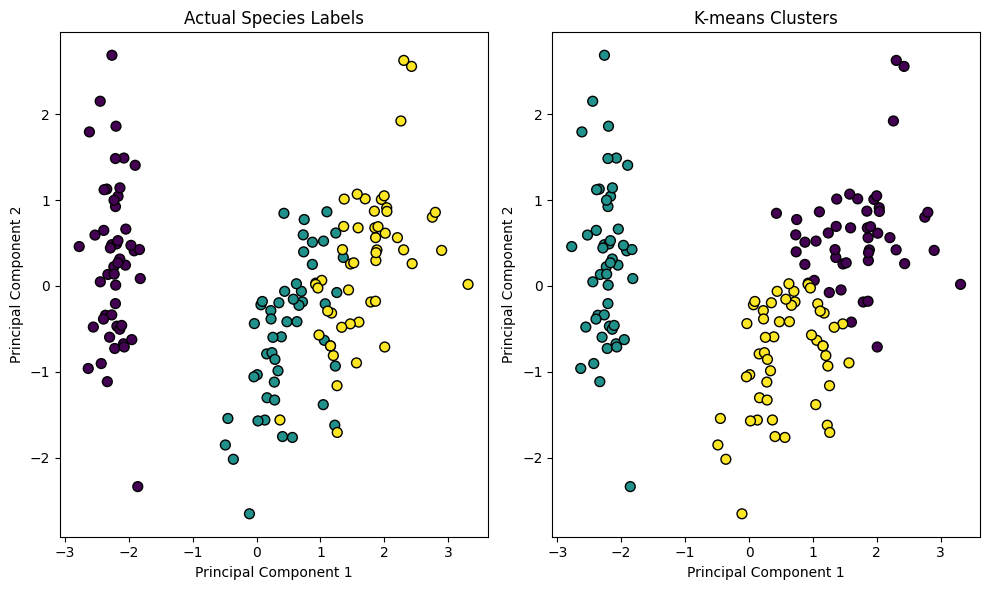

In [ ]:
# load the dataset
d = load_iris()
X = d.data
y = d.target

#instantiate the scaler for norm.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Actual Species Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


## Question 4 - Basic

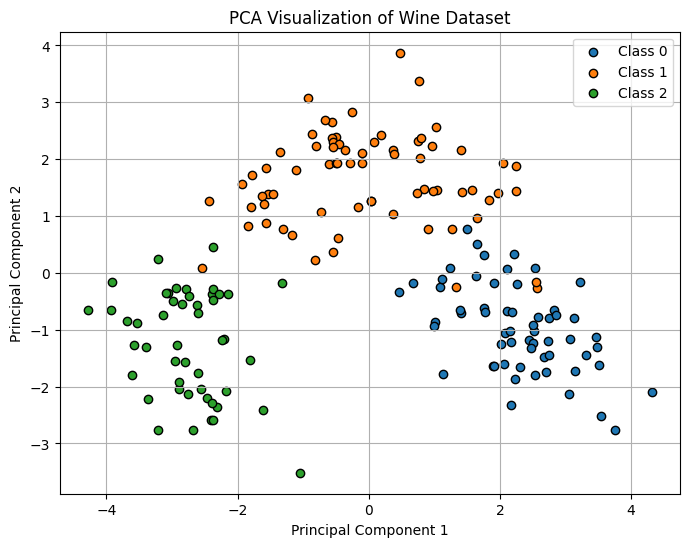

In [ ]:
d = load_wine()
X = d.data
y = d.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}', edgecolor='k')

plt.title('PCA Visualization of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
